# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
#https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from statsmodels.stats.weightstats import ztest

df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


- I start with some data visualization to get better undrestanding of the data.
- Same value counts of female and male

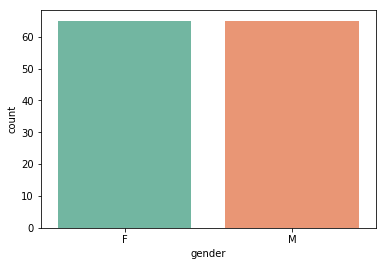

In [2]:
Temp=df['temperature']
Gen=df['gender']
hrate=df['heart_rate']

sns.countplot(x='gender',data=df,palette='Set2')
plt.show() #Same value counts of Female and male

swarmplot to show the distribution of the temperature for each gender

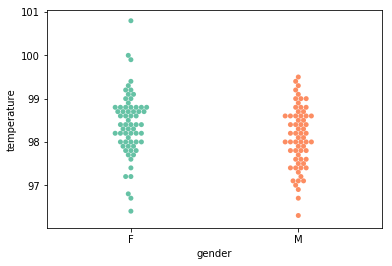

In [3]:
sns.swarmplot(x='gender',y='temperature',data=df,palette='Set2')
plt.show()

swarmplot to show the distribution of the heart rate for each gender

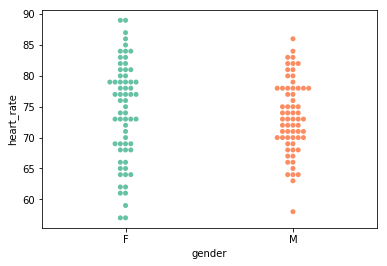

In [4]:
sns.swarmplot(x='gender',y='heart_rate',data=df,palette='Set2')
plt.show()

Histogram of each gender

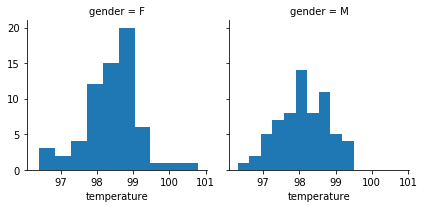

In [5]:
g = sns.FacetGrid(data=df,col='gender')
g.map(plt.hist,'temperature')
plt.show()

## 1. Is the distribution of body temperatures normal? 

In [6]:
stats.normaltest(Temp) 

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

Histogram plot is close to bell shape, The data can be normal but we need to check other methods

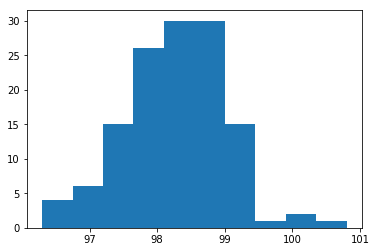

In [7]:
plt.hist(Temp)#,bins=20)
plt.show() 

C:\Python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


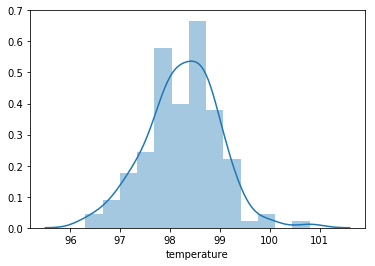

In [8]:
sns.distplot(Temp)
plt.show()

Quantile-Quantile Plot

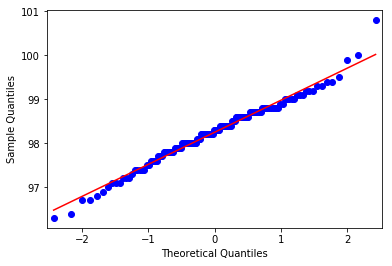

In [9]:
qqplot(Temp, line='s')
plt.show() #Running the example creates the QQ plot showing the scatter plot of points in a diagonal line, 
#closely fitting the expected diagonal pattern for a sample from a Gaussian distribution.

- The p-value obtained is approximately 0.259 which is much greater than alpha=0.05. Therefore, the temperatures is a normal distribution. (Fail to reject H0)
- I  plot the histogram to see if it is colse to bell-shape.
- I construct a quantile plot which is showing the scatter plot of points in a diagonal line, closely fitting the expected diagonal pattern for a sample from a Gaussian distribution.
- As it is shown, the distribution is indeed normal in nature. 
- The seaborn histogram plot shows us that the distribution is normal as the frequency of values decrease exponentially as we move away from the mean.
- Also, the quantile plot is a straight line which strenghtens our claim. 

- **Conclusion: The sampled distribution is normal and there is evidence indicating the sample distribution is a good representative of the population**

## 2. Is the sample size large? Are the observations independent? 


In [10]:
len(Temp)

130

- According to the Central Limit Theorem, we require at least 30 samples to satisfy the CLT conditions. The length of our data is 130. So the sample size is large enough.
- The observations are the temperature and heart rate of each person. It can be safely assumed that the measurements of temperature and heartbeat for one person is not affected by the measurements of another person. Furhtermore, we have already discovered that the sampled distrbution is normal and this led us to conclude that the distribution is a good representation of the population.
- **Conclusion: The sample size is large enough. We can apply z-statistics for hypothesis testing.
The samples are statistically independent.**

## 3. Is the true population mean really 98.6 degrees F? 


- The sample size is greater than 30 so z-statistics is enough to conclude the answer.
- I use a one sample test because we are only interested in the mean of one population.
- We do not have data about the true population mean as it is not possible to sample the entire population. However, we can perform a hypothesis test and calculate the appropriate p-value for the test. If it is below a threshold (alpha= 0.05), we can reject the hypothesis and if it is greater, we can accept it.
- For the purpose of this test, we define:
-   Null Hypothesis(H0): The true population mean is 98.6F.
-   Alternate Hypothesis (Ha): The true population mean is not 98.6F.

In [11]:
Ture_mean=98.6
Sample_mean=np.mean(Temp)
Sample_std=np.std(Temp)
sigma_x=Sample_std/np.sqrt(len(Temp))

print('Sample mean: ', Sample_mean)
print('Sample std: ', Sample_std)
print('Sigma x: ', sigma_x)

Sample mean:  98.24923076923078
Sample std:  0.7303577789050377
Sigma x:  0.06405661469519336


Apply z-Statistics

In [12]:
z=(98.6-Sample_mean)/sigma_x
p_z=(1-stats.norm.cdf(z))*2
print(z,p_z)

5.475925202078116 4.352315174926957e-08


Apply t-Statistics

In [13]:
t=z
p_t=(1-stats.t.cdf(t,len(df)-1))*2
print(t,p_t)

5.475925202078116 2.1887464640713006e-07


In [14]:
p_t/p_z

5.0289245518806736

I also use ztest function to claculate z score and p-value.

In [15]:
z = ztest(Temp,value=98.6)
print("Z-score is equal to : %6.3F  p-value equal to: %6.9F" % (abs(z[0]),z[1]))

Z-score is equal to :  5.455  p-value equal to: 0.000000049


- The p_t is 5 times larger than p_z, but still extremely smaller than alpha.
- H0 is rejected.
- **Conclusion: Both the p-value obtined from z-statistics and t-statistics is very small. So we can rejet the null hypothesis. The true mean is NOT 98.6F.**

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. Which one is the correct one to use? What do you notice? What does this tell you about the difference in application of the t and z statistic? 

- I am checking the resul with three different seed values, since I need to get the sample randomly. To see how the final result differ. 
- Since the sample size in smaller than 30, we cannot use z-tset. But I am checking both z-test and t-test to see the difference.

In [16]:
Ture_mean=98.6

np.random.seed(1)
Temp_Sample=Temp.sample(n=10)
Sample_mean=np.mean(Temp_Sample)
Sample_std=np.std(Temp_Sample)
sigma_x=Sample_std/np.sqrt(len(Temp_Sample))

print('Sample mean: ', Sample_mean)
print('Sample std: ', Sample_std)
print('Sigma x: ', sigma_x)

z = ztest(Temp_Sample,value=98.6)
print("Z-score is equal to : %6.3F  p-value equal to: %6.9F" % (abs(z[0]),z[1]))

t=stats.ttest_1samp(Temp_Sample,98.6)
print("t-score is equal to : %6.3F  p-value equal to: %6.9F" % (abs(t[0]),t[1]))

Sample mean:  98.05
Sample std:  0.8393449827097319
Sigma x:  0.26542418879973995
Z-score is equal to :  1.966  p-value equal to: 0.049319566
t-score is equal to :  1.966  p-value equal to: 0.080884236


In [17]:
Ture_mean=98.6

np.random.seed(10)
Temp_Sample=Temp.sample(n=10)
Sample_mean=np.mean(Temp_Sample)
Sample_std=np.std(Temp_Sample)
sigma_x=Sample_std/np.sqrt(len(Temp_Sample))

print('Sample mean: ', Sample_mean)
print('Sample std: ', Sample_std)
print('Sigma x: ', sigma_x)


z = ztest(Temp_Sample,value=98.6)
print("Z-score is equal to : %6.3F  p-value equal to: %6.9F" % (abs(z[0]),z[1]))

t=stats.ttest_1samp(Temp_Sample,98.6)
print("t-score is equal to : %6.3F  p-value equal to: %6.9F" % (abs(t[0]),t[1]))

Sample mean:  98.28
Sample std:  1.2639620247459957
Sigma x:  0.3996998874155454
Z-score is equal to :  0.760  p-value equal to: 0.447543654
t-score is equal to :  0.760  p-value equal to: 0.466970599


In [18]:
Ture_mean=98.6

np.random.seed(100)
Temp_Sample=Temp.sample(n=10)
Sample_mean=np.mean(Temp_Sample)
Sample_std=np.std(Temp_Sample)
sigma_x=Sample_std/np.sqrt(len(Temp_Sample))

print('Sample mean: ', Sample_mean)
print('Sample std: ', Sample_std)
print('Sigma x: ', sigma_x)


z = ztest(Temp_Sample,value=98.6)
print("Z-score is equal to : %6.3F  p-value equal to: %6.9F" % (abs(z[0]),z[1]))

t=stats.ttest_1samp(Temp_Sample,98.6)
print("t-score is equal to : %6.3F  p-value equal to: %6.9F" % (abs(t[0]),t[1]))

Sample mean:  97.8
Sample std:  0.7509993342207418
Sigma x:  0.2374868417407578
Z-score is equal to :  3.196  p-value equal to: 0.001394718
t-score is equal to :  3.196  p-value equal to: 0.010905579


- I cannot conclude, since the p-value differ each time. So I try bootstrap replicate.
- First I coumpute the observed difference between the theoretical true mean and the actual sample mean
- Then I shift the mean
- I create the 100000 bootstrap replicate to get the p-value.

In [19]:
actual_difference = 98.6 - np.mean(Temp)
Temp_shifted = Temp - np.mean(Temp) + 98.6

#Computing 100,000 bootstrap replicates from the shifted_array under the null hypothesis with only 10 samples
bs_replicates = np.empty(100000)

for i in range(100000):
    bs_sample = np.random.choice(Temp_shifted, 10)
    bs_sample_mean = np.mean(bs_sample)
    test_statistic = 98.6 - bs_sample_mean
    bs_replicates[i] = test_statistic
    
#Computing the p-value from the boostrap replicates  
p_value = np.sum(bs_replicates >= actual_difference) / len(bs_replicates)

print('P-value is equal to: %6.4F' % (p_value))

P-value is equal to: 0.0620


**Conclusion: According to our p-value we observe that the difference between the theoretical true mean and the boostrap resample means was at least as big as the observed difference between the theoretical true mean and the actual sample mean, about 6.3% of the time. This value is not statistically significant as it is more than 0.05 , but practically it is still a very small number and we should still conclude acording to this data that the average human body temperature is closer to 98.2 degree Fahrenheit and reject our null hypothesis.**

## 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [20]:
Ture_mean=98.6
Sample_mean=np.mean(Temp)
Sample_std=np.std(Temp)
sigma_x=Sample_std/np.sqrt(len(Temp))

z0=stats.norm.ppf(0.975) #percent point function for 95% confidence level
Temp_upper=Sample_mean+z0*sigma_x
Temp_lower=Sample_mean-z0*sigma_x

print('The normal Temp is from ', Temp_lower, ' to ',Temp_upper)

The normal Temp is from  98.12368211145665  to  98.37477942700491


- 95% confident that the true mean is somewhere between [98.12 , 98.37], so any temperature outside of this range is abnormal.
- **Conclusion: A body temperature below 98.12 and more than 98.37 is abnormal.**

## 6. Is there a significant difference between males and females in normal temperature? 

In [21]:
Male_Temp=df[df.gender=='M']['temperature']
Female_Temp=df[df.gender=='F']['temperature']

In [22]:
Male_Temp.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [23]:
Female_Temp.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

- H0=True mean temperature of men and women is equal.
- Ha=True mean temperature mean of men and women is no equal.
- alpha=0.05

In [24]:
H0_mean=0
Mean_diff=Male_Temp.mean()-Female_Temp.mean()
Male_var=(Male_Temp.std()**2)/len(Male_Temp)
Female_var=(Female_Temp.std()**2)/len(Female_Temp)

sigma_diff=np.sqrt(Male_var+Female_var)

abs(Mean_diff), sigma_diff

(0.289230769230727, 0.12655395041982642)

In [25]:
z=(H0_mean-Mean_diff)/sigma_diff
p_value=(1-stats.norm.cdf(z))*2
p_value

0.022287360760677277

- p_value is less than alpha, so the null hypothesis should be rejected and the alternative hypothesis has to be accepted.
- **Conclusion: It means there is a significant difference in male and female body temperature**